# Image Processing: Measuring the Area of America

- **Author:** Adam Hughes
- **Date:** 1/25/15
- **Affiliation:** George Washington University

In this demo, we will measure the area of America from a map, and see how close it is to the true area of America: **3.806 million sq miles**.  We'll touch on many important image processing concepts, using a popular new image prcoessing framework in Python, **scikit-image**.  

<font color='blue'>**Your assignment will be to repeat this process for Canada**</font>; measuring it's square mileage from the image and comparing to the true value.  Your final submission should include a .ipynb file, and an HTML representation of the notebook, using `ipython nbconvert`.  Directions for converting to `HTML` are described later in this document.

### Install Scikit Image

Before getting started, install scikit-image through Canopy's package manager.  You will need to login with your student account to access this package.  Once installed, you can verify it is working by running:

In [3]:
import skimage

If you get an error, try restarting Canopy/IPython Notebook.

### Step 1: Import the image of America

I downloaded an image of America from:  http://www.lib.utexas.edu/maps/world.html.  I cropped out North America and painted all of the bodies of water white.  This could have been done in python, but it's easier for the sake of the demo to just start here.  This image is saved as **worldmap_cropped.png**.

We will primarily use `scikit-image` in this demo.  First, we will use `skimage.io.imread` to read the image into memory.  The image can be plotted easily using matplotlib's `imshow()` function.  We can import matplotlib, numpy and a handful of other scientific libraries use the `%pylab inline` notebook magic function.

Populating the interactive namespace from numpy and matplotlib


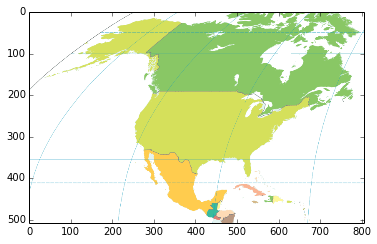

In [4]:
%pylab inline  
import skimage.io as skio

image = skio.imread('worldmap_cropped.png')
plt.imshow(image)

### Step 2: Image properties

Scikit image will store this image as a numpy array.  Because this is a color image, we expect the image to have three dimensions: two spatial dimensions for the x and y coordinates of the pixels, and four color coordinates the the red green, blue and alpha (opacity) channels of the color.  So just to give you an exampe:

    I(x,y,r,g,b) = (200, 400, 0.5, 0.2, 0.7, 1.0)
    
Would mean that the pixel at position `x=200, y=400` has an rgb color of (0.5, 0.2, 0.7) and has an opacity of 1.0.  Opacity is kind of a strange unit; some color images are stored as three channels, but some are stored with this fourth opacity channel.  Scikit-image basically ignores the opacity, and you can too for this example.  We can verify the dimensions and shape of the image easily in `numpy`.

In [5]:
'shape = %s   dimensions = %s' % (image.shape, image.ndim)

'shape = (508, 806, 4)   dimensions = 3'

### 1-channel/grayscale

We can easily map the 3-channel color space into a 1-channel brightness/grayscale space.  Each color is mapped onto a shade of gray using the a standard color-2-gray transformation (http://www.poynton.com/PDFs/ColorFAQ.pdf).   Scikit-image makes this very easy through their `skcolor` module. For operations in image processing, it is sometimes advantageous to work with 1-channel/gray images, and sometimes with 3-channel/rgb images.

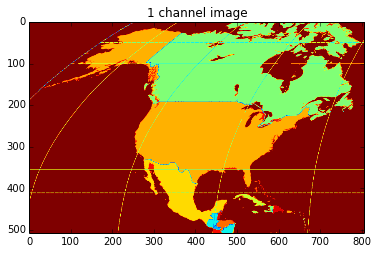

In [6]:
import skimage.color as skcolor

grayimage = skcolor.rgb2gray(image)
plt.imshow(grayimage)
plt.title('1 channel image');

You are probably thinking "hey, this isn't gray".  In fact, gray is just a scalar colormap.  The colormap used by matplotlib by default is not so useful, and that's why the image above still seems colored.  **These are FALSE COLORS.**  Such false color maps are often used in "colorful" NASA images.  Matplotlib has a lot of builtin colormaps (http://wiki.scipy.org/Cookbook/Matplotlib/Show_colormaps)

Let's replot with a gray colormap:

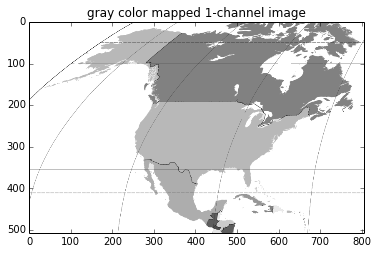

In [7]:
plt.imshow(grayimage, cmap='gray')
plt.title('gray color mapped 1-channel image');

### Segementing America

`Segmentation`, the act of extracting interesting features from an image, is probably the most common taks in image processing.  Your brain is very good at this.  You probably recognized America right away?  But how can we explicitly define features of America that isolate it from the other regions in this image?  Because we chose a colored image, we can essentially define a brightness filter that will keep only pixels in a certain color or grayscale range.  In doing so, it becomes straightforward to isolate America.  This process is called thresholding.  

Let's plot the `histogram` of the image brightness:

/home/adam/Enthought/Canopy_32bit/User/lib/python2.7/site-packages/matplotlib/axes.py:8261: UserWarning: 2D hist input should be nsamples x nvariables;
 this looks transposed (shape is 508 x 806)
  'this looks transposed (shape is %d x %d)' % x.shape[::-1])


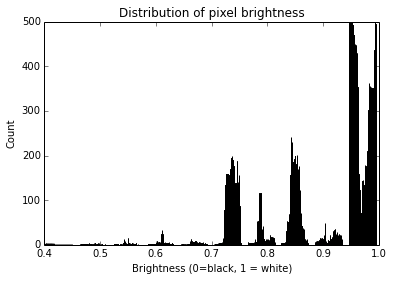

In [8]:
plt.hist(grayimage)
plt.xlabel('Brightness (0=black, 1 = white)')
plt.ylabel('Count')
plt.title('Distribution of pixel brightness');

We see that there are four major brightness regions to the image.  Brightness of 1 means white, and it's clear that the majority of the image is white.  The spread is due to small pixel-to-pixel in the original image color, which probably got rounded and smoothed out during out down-conversion to gray.  In any case, the major contributors to the brightness that could be America correspond to:

   - $0.7 \lt y \leq 0.77$
   - $0.83 \lt y \leq 0.84$
   
Just eyeballing.  We can create a filter in numpy from this information very easily using what's called boolean indexing:

In [9]:
mask = (grayimage > 0.7) & (grayimage < 0.77)

This returns True for any pixel that falls into the brightness values of 0.7 and 0.77, and False everywhere else.  This process of boolean indexing is also referred to as `masking`.  Let's visualize our mask:

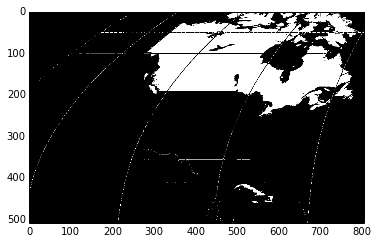

In [10]:
plt.imshow(mask, cmap='gray');

**Turns out that corresponded to Canada!!**

Let's try the other yvalue filters (0.83-0.84)

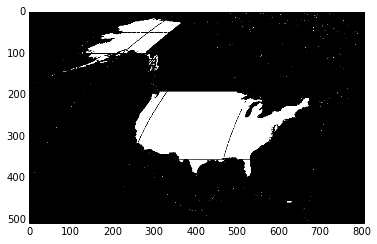

In [11]:
murica_mask = (grayimage > 0.83) & (grayimage < 0.84)
plt.imshow(murica_mask, cmap='gray');

Let's celebrate this finding.  By the way, did you ntoice that this small change of islands off of the coast of Alaska is indeed America and not Canada?  Check the original image.

In [12]:
from IPython.lib.display import YouTubeVideo

YouTubeVideo('ox4IRQVGsBU')  #<--- Unique youtube ID

While thresholding worked for us here, in general, it can be very difficult to isolate interesting features from images, and general machine learning tools to do so are at the forefront of R & D in many technical fields.  Google Image performs such operations to categorize images based on features without human involvement.

### Measuring area

Now that we have america isolated, it's very easy to measure the number of pixels in the image that correspond to america.  We just sum the `murica_mask`.  All True's will evaluate to 1 and all Falses to 0.

In [13]:
'Murica Area: %s square pixels' % np.sum(murica_mask)

'Murica Area: 58875 square pixels'

If we look at the total number of pixels (px) in the image, it's just the x dimension of the image times the y dimension.

In [14]:
px_x = image.shape[0]
px_y = image.shape[1]
netarea = px_x * px_y

print 'X px: %s   Y px: %s   Total Area: %s px^2' % (px_x, px_y, netarea)

X px: 508   Y px: 806   Total Area: 409448 px^2


Thus, the percent of the image occupied by america is just the ratio of America's square pixels to the total square pixels.  Let's be careful with out float division here by pulling in the __future__ division function.

In [15]:
from __future__ import division

ratio = np.sum(murica_mask) / netarea
percent_ratio = 100.0 * ratio
print 'Percent of image occupied by America: %.2f%%' % percent_ratio

Percent of image occupied by America: 14.38%


But to convert the square pixels into square miles, *we need some sort of a conversion from pixels to length.*

# Getting a scale from the full image

Consider the original, full image of the worldmap:

Image shape: (1538, 2753, 4)


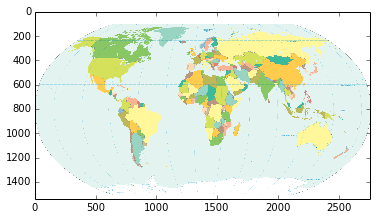

In [23]:
full_map = skio.imread('worldmap.png')
print 'Image shape: %s' % str(full_map.shape)
imshow(full_map);

**The image is 2753 pixels across**.  Notices this corresponds to the circumference of the earth!  We can use this data to build a scale:

$C = 2\pi R$

$R = \frac{C}{2\pi}$

$R_{\mbox{px}} = \frac{2753}{2 \pi}$

In [27]:
'Earth radius = %.2f pixels, corresponding to 3963.16 miles' % (2753 / math.pi)

'Earth radius = 876.31 pixels, corresponding to 3963.16 miles'

Where I merely looked up the radius of Earth in miles.  This corresponds to a scale of:

$\frac{3963.13 mi}{876.31 px} = 4.523 \frac{\mbox{miles}}{\mbox{px}}$

We found that America occupied roughly 58875 square pixels in the image.  How many square miles is this?


$58,875 px^2 \times \left(\frac{4.523mi}{px} \right)^2 = 1,204,437mi^2$

**The true value is 3.8 million square miles, so this method is not very accurate**.  Some likely sources of error include not incorporating Hawaii, grid lines slicing through the image, and mostly that the map may not be an accurate projecting of a round globe onto a plane.  Even still, this error is larger than I had expected.

---------------------------------------------------------------------------------------------------------

<font color='green'>**This is the end of the assignment, the rest of the notebook is supplementary information.**</font>

### Submiting the Assignment as an HTML

To convert this notebook to an html file, we'll use [`ipython nbconvert`](http://ipython.org/ipython-doc/1/interactive/nbconvert.html), a nice utility that installed along with IPython.  It will convert notebooks to html, pdf, tex and other document formats.  `nbconvert` is called as:

    $ ipython nbconvert --to FORMAT notebook.ipynb

Typically, one would run this command in a terminal outside of the notebook; however, we can use the **bash** cell magic to run it right here in the notebook.  Uncomment the cells below and run to convert the contents of this notebook.  **<font color='red'>Be careful!  This will overwrite the existing .HTML file when run.</font>**

In [42]:
#%%bash 
#ipython nbconvert --to html worldmap_notebook.ipynb

### Thresholding fails to segment most images. 

What if we had used this image (requires internet connection):

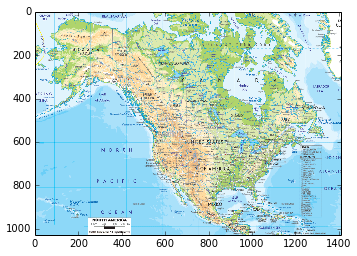

In [17]:
image_complex = skio.imread('http://www.ezilon.com/maps/images/North-America-physical-map.gif')
plt.imshow(image_complex);

Check out the 1-channel colormap of this:

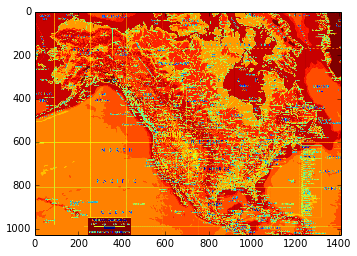

In [18]:
plt.imshow(skcolor.rgb2gray(image_complex));

Not so easy anymore...